## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

from scipy import stats

#interactive data visualisation 
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.express as px

## 2. Loading Data

Load Breast Cancer Data
Source: UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set
URL: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
raw_data = pd.read_csv('data.csv')

## 3. Initial exploration

In [3]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
raw_data.shape

(569, 33)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
type(raw_data)

pandas.core.frame.DataFrame

Summary: The breast cancer data is a table of 33 columns with 529 rows. Each row represents an instance, where each instance is assigned an id (column 1 which are all integer values). Initial look highlights there are actually 31 features for each ID. 30 of these columns are filled with floats, and the diagnosis column has data type 'object'. 

There are a few columns that are related to each other. The data description from the source stated:

    'The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.'

The fields of our data don't quite match the description- this might mean to change of the dataset over time - but, all the column names match the names of the attributes stated in the metadata. 

## 4. Identify missing data and cleaning up the dataset. 

In [9]:
#identifies which columns have missing data
raw_data.columns[raw_data.isna().any()]

Index(['Unnamed: 32'], dtype='object')

Text(0.5, 14.09375, 'Attributes')

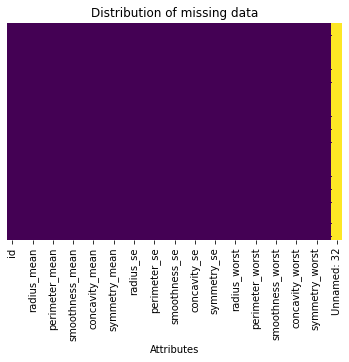

In [10]:
missing_data = sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
missing_data.set_title('Distribution of missing data')
missing_data.set_xlabel('Attributes')

Only missing data is in the 'Unnamed: 32' column, which isn't providing any useful information. 

In [11]:
#get rid of the unnamed column
clean_data = raw_data.drop('Unnamed: 32', axis = 1)

In [12]:
clean_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#check for categorical data types- the only categorical data is the diagnosis. 
clean_data.select_dtypes(include = 'object').head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [14]:
# M is malignant and B is benign so let's see how the distribution of B and M values
clean_data.select_dtypes(include = 'object').value_counts()

diagnosis
B            357
M            212
dtype: int64

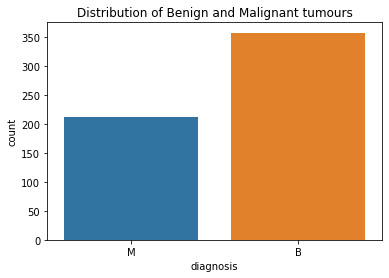

In [15]:
diagnosis = sns.countplot(x='diagnosis', data= clean_data)
diagnosis.set_title('Distribution of Benign and Malignant tumours');

Observation: There are more benign samples in the data than malignant. 

In [16]:
#might be easier if we had Boolean values of 1 or 0 instead of B and M in the columns. 
#This will make it easier to run algorigms later on the dataset. 
clean_data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

In [17]:
clean_data.shape
#check if there are any duplicate data e.g same id number- there aren't any. 
clean_data['id'].nunique()

569

Whilst we can now confirm that all the ID numbers are unique, the ID doesn't really a feature so we should be able to drop this too. 

In [18]:
df_attribute = clean_data.drop('id', axis=1)

In [19]:
df_attribute.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#standard errors for each attribute 
df_errors = df_attribute.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis = 1)

In [21]:
df_errors = df_errors.reindex(sorted(df_errors), axis = 1)

In [22]:
df_errors.head()

,area_se,compactness_se,concave points_se,concavity_se,diagnosis,fractal_dimension_se,perimeter_se,radius_se,smoothness_se,symmetry_se,texture_se
0,153.40,0.04904,0.01587,0.05373,1,0.006193,8.589,1.0950,0.006399,0.03003,0.9053
1,74.08,0.01308,0.01340,0.01860,1,0.003532,3.398,0.5435,0.005225,0.01389,0.7339
2,94.03,0.04006,0.02058,0.03832,1,0.004571,4.585,0.7456,0.006150,0.02250,0.7869
3,27.23,0.07458,0.01867,0.05661,1,0.009208,3.445,0.4956,0.009110,0.05963,1.1560
4,94.44,0.02461,0.01885,0.05688,1,0.005115,5.438,0.7572,0.011490,0.01756,0.7813


In [23]:
df_means = df_attribute.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se'], axis=1)

In [24]:
df_means = df_means.reindex(sorted(df_means), axis = 1)

In [25]:
df_means.head()

,area_mean,area_worst,compactness_mean,compactness_worst,concave points_mean,concave points_worst,concavity_mean,concavity_worst,diagnosis,fractal_dimension_mean,...,perimeter_mean,perimeter_worst,radius_mean,radius_worst,smoothness_mean,smoothness_worst,symmetry_mean,symmetry_worst,texture_mean,texture_worst
0,1001.0,2019.0,0.27760,0.6656,0.14710,0.2654,0.3001,0.7119,1,0.07871,...,122.80,184.60,17.99,25.38,0.11840,0.1622,0.2419,0.4601,10.38,17.33
1,1326.0,1956.0,0.07864,0.1866,0.07017,0.1860,0.0869,0.2416,1,0.05667,...,132.90,158.80,20.57,24.99,0.08474,0.1238,0.1812,0.2750,17.77,23.41
2,1203.0,1709.0,0.15990,0.4245,0.12790,0.2430,0.1974,0.4504,1,0.05999,...,130.00,152.50,19.69,23.57,0.10960,0.1444,0.2069,0.3613,21.25,25.53
3,386.1,567.7,0.28390,0.8663,0.10520,0.2575,0.2414,0.6869,1,0.09744,...,77.58,98.87,11.42,14.91,0.14250,0.2098,0.2597,0.6638,20.38,26.50
4,1297.0,1575.0,0.13280,0.2050,0.10430,0.1625,0.1980,0.4000,1,0.05883,...,135.10,152.20,20.29,22.54,0.10030,0.1374,0.1809,0.2364,14.34,16.67


Summary: Turns out there are only 30 features for each tumour sample and these are stored in the df_attribute dataframe. The clean_data dataframe now holds all the data for each instance without the ID numbers. For both of these dataframe, in the diagnosis column the values of M and B have been replaced with 1 and 0 respectively.

Furthermore, we can see that there are 10 distinct features: radius (mean of distances from center to points on the perimeter), 
texture (standard deviation of gray-scale values), perimeter, area, smoothness (local variation in radius lengths), compactness (perimeter^2 / area - 1.0), concavity (severity of concave portions of the contour), concave points (number of concave portions of the contour), symmetry, fractal dimension ("coastline approximation" - 1). These values have been processed and each feature has 3 columns representing data for them. The dataframe df_errors contains the standard errors of each atribute, and df_means contains the mean values of each attribute and the "worst" values which are calculated as the mean of the three largest values in each attribute. 

## 5. Outliers and initial visualisations

Now we have the data cleaned, next is to look for outliers or any extreneous values. An easy way to do this is to draw boxplots for each of the features and to see if there are clear outliers. 

In [26]:
fig1 = px.box(df_means, color = 'diagnosis')
fig1.show()

In [27]:
fig2 = px.box(df_errors, color = 'diagnosis')
fig2.show()

Attributes that seem to have quite distinguishable outliers are: area which also has the largest variance in standard error. Permieter also seems to have quite noticable outliers which explains noticable variance in it's standard error. These two are followed by the radius and the texture of the tumours.

In [28]:
fig = px.imshow(df_means.corr())
fig.show()

The heatmap highlights some of the features that show high positive correlation with the diagnosis as area, concavity points, perimeter, and the radius. 

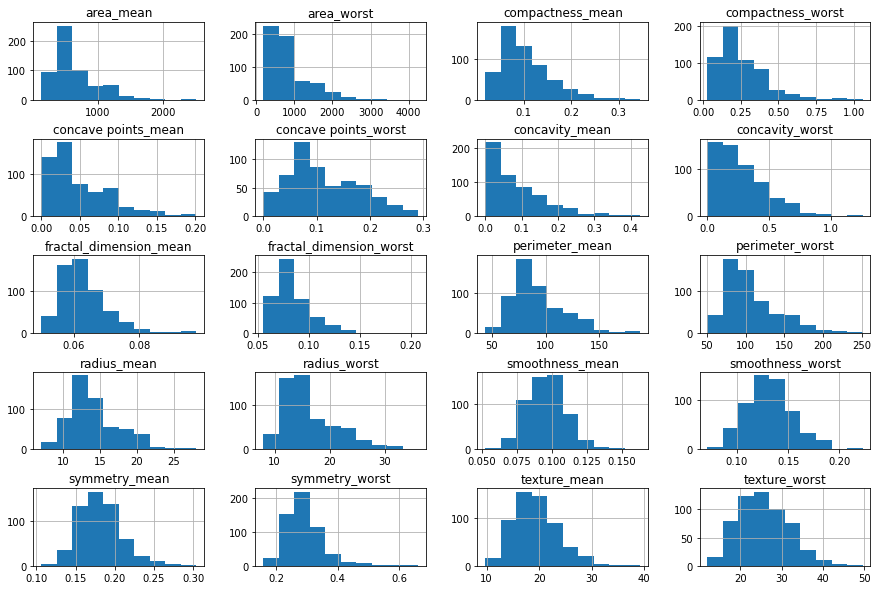

In [29]:
df_means.drop('diagnosis', axis = 1).hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

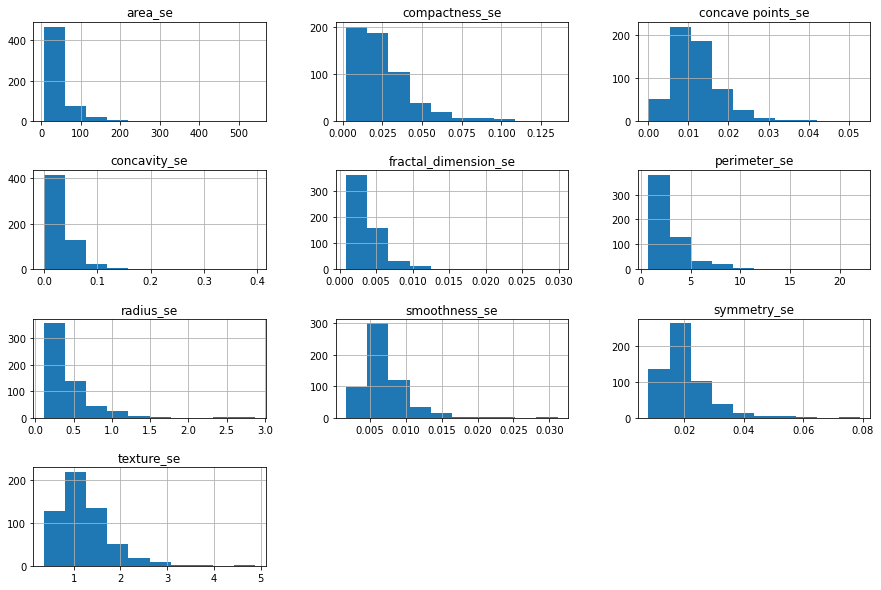

In [30]:
df_errors.drop('diagnosis',axis = 1).hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)